# Data, Simen (Draft)

**Data files inculded, found in data/**
* trait_2020.txt Trait data from field plants, August 2020
* lc_2021.txt Light curve series autumn 2021
* lc_2021_branch.txt Light curve branch samples 2021
* lc_2020_branch.txt Light curve branch samples 2020
* lab_health.txt 2020->2021

**Other files**
* ploidy.txt Ploidy level and plant ID table
* ingv_id_table.txt Ingrid T. ID to PBE ID

**Contents**
1. Data cleanup (lc_2021)
2. Data visualization (lc_2021)
3. Fitted curves (lc_2021)
4. Fitted curves (lc_2020_branch)
5. Fitted curves (lc_2021_branch)
6. Data visulization (trait_2020)
7. Extra (Lab health)

In [1]:
import os
import re
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize as opt;

In [2]:
print(os.getcwd())

C:\Users\simen\OneDrive\1Scientific Papers masters\1SIMEN_master\Scripts


In [3]:
plo = open("data/ploidy.txt","r")
ploidy_key = {}

for p in plo:
    p = p.strip()
    lis = p.split("\t")
    ploidy_key[lis[0]] = lis[1]
plo.close()

# 1.1 Changing raw data from this...

In [4]:
data = open("data/lc_2021.txt", "r")
for i in range(21):
    pl = data.readline()
    print(pl.strip()[:70], "...")
print("...")
data.close()

PlantID	SO18-H1-5-41 ...
Time (rel/ms)	Date	Time	Type	No.	2:Mark	2:F	2:Fm'	2:PAR	2:Temp	2:Y (II ...
0			D		Device Nr: #2, MINI-PAM-II (PYAD0264A) ...
0	2021-08-10	08:47:26	SLCS		Light Curve start ...
0	2021-08-10	08:47:26	REG1		#2: alpha: - , ETRm: - , Ik: -   ( beta: - ...
0	2021-08-10	08:47:26	REG2		#2: alpha: 0.164, ETRm: 27.794, Ik: 169.90 ...
655	2021-08-10	08:47:27	SCHS		Chart start ...
656	2021-08-10	08:47:27	FO	2	B	263	875	0	15.6	0.699	0	-	0.84	-	-	-	-	- ...
100640	2021-08-10	08:49:07	F	3	B	204	336	23	15.7	0.393	3.8	177	0.84	0. ...
200622	2021-08-10	08:50:47	F	4	B	184	299	43	15.6	0.385	7	167	0.84	0.87 ...
300612	2021-08-10	08:52:27	F	5	B	184	314	63	15.6	0.414	11	171	0.84	0.9 ...
400592	2021-08-10	08:54:07	F	6	B	179	296	87	15.6	0.395	14.4	166	0.84	0 ...
500575	2021-08-10	08:55:47	F	7	B	171	263	121	15.6	0.35	17.8	155	0.84	0 ...
600579	2021-08-10	08:57:27	F	8	B	171	231	185	15.6	0.26	20.2	143	0.84	0 ...
700570	2021-08-10	08:59:07	F	9	B	179	228	277	15.6	0.215	25	142	0.84	0. ...
8005

In [5]:
data = open("data/lc_2021.txt", "r")
output = open("output.txt", "w")

do_print = 0
l = 0
m = 0
for line in data:
    
    line = re.sub("Time\s\(.......\s","",line)
    line = re.sub("^\d{1,10}\t","",line)  
    
    if re.search("Date", line):
        if l == 1:
            output.write("mnr\t"+"ID\t"+"ploidy\t"+line)
    
    if re.search("PlantID|SO1\d", line, re.I):
        id = re.search("SO1\d-H\d-\d+-\d+X*", line, re.I).group(0)
        
    if re.search("Chart start", line, re.I):
        do_print = 1
        
    if re.search("Light Curve end", line, re.I):
        m = 0
        do_print = 0
        
    if do_print == 1:
        if re.search("Chart start", line, re.I):
            pass
        else:
            m = m + 1
            output.write(str(m)+"\t"+id+"\t"+ploidy_key[id]+"\t"+line.strip()+"\n")

    l += 1
    
output.close()
data.close()

# 1.2 To this

In [6]:
output = open("output.txt", "r")
for i in range(15):
    pl = output.readline()
    print(pl[:70],"...")
print("...")
output.close()

mnr	ID	ploidy	Date	Time	Type	No.	2:Mark	2:F	2:Fm'	2:PAR	2:Temp	2:Y (II ...
1	SO18-H1-5-41	4x	2021-08-10	08:47:27	FO	2	B	263	875	0	15.6	0.699	0	-	 ...
2	SO18-H1-5-41	4x	2021-08-10	08:49:07	F	3	B	204	336	23	15.7	0.393	3.8	 ...
3	SO18-H1-5-41	4x	2021-08-10	08:50:47	F	4	B	184	299	43	15.6	0.385	7	16 ...
4	SO18-H1-5-41	4x	2021-08-10	08:52:27	F	5	B	184	314	63	15.6	0.414	11	1 ...
5	SO18-H1-5-41	4x	2021-08-10	08:54:07	F	6	B	179	296	87	15.6	0.395	14.4 ...
6	SO18-H1-5-41	4x	2021-08-10	08:55:47	F	7	B	171	263	121	15.6	0.35	17.8 ...
7	SO18-H1-5-41	4x	2021-08-10	08:57:27	F	8	B	171	231	185	15.6	0.26	20.2 ...
8	SO18-H1-5-41	4x	2021-08-10	08:59:07	F	9	B	179	228	277	15.6	0.215	25	 ...
9	SO18-H1-5-41	4x	2021-08-10	09:00:47	F	10	B	175	203	408	15.6	0.138	23 ...
10	SO18-H1-5-41	4x	2021-08-10	09:02:27	F	11	B	177	196	612	15.6	0.097	2 ...
11	SO18-H1-5-41	4x	2021-08-10	09:04:07	F	12	B	177	191	800	15.6	0.073	2 ...
12	SO18-H1-5-41	4x	2021-08-10	09:05:47	F	13	B	175	188	1119	15.6	0.069	 ...
13	SO18-H1-5-41	4x	2021-0

# 1.3 Converting .txt file to a .csv file

* checking data for missing values or if Dtype is wrong
* removing useless columns

In [7]:
output = open("output.txt", "r")
pddata = open("pd-data.csv","w")

l=0
for line in output:
    top = re.sub("\t",",",line)
    top = re.sub(",-",",0",top)
    if l == 0:
        top = re.sub("2:","",top)
        top = re.sub(" ","_",top)
        top = top.lower()
    pddata.write(top)
    l=1

output.close()
pddata.close()
df = pd.read_csv("pd-data.csv")

df = df.drop(columns=["temp","no.","mark","batt.","etr-f."])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mnr      780 non-null    int64  
 1   id       780 non-null    object 
 2   ploidy   780 non-null    object 
 3   date     780 non-null    object 
 4   time     780 non-null    object 
 5   type     780 non-null    object 
 6   f        780 non-null    int64  
 7   fm'      780 non-null    int64  
 8   par      780 non-null    int64  
 9   y_(ii)   780 non-null    float64
 10  etr      780 non-null    float64
 11  fo'      780 non-null    int64  
 12  qp       780 non-null    float64
 13  qn       780 non-null    float64
 14  ql       780 non-null    float64
 15  npq      780 non-null    float64
 16  y_(no)   780 non-null    float64
 17  y_(npq)  780 non-null    float64
 18  fo       780 non-null    int64  
 19  fm       780 non-null    int64  
 20  fv/fm    780 non-null    float64
dtypes: float64(9), i

In [8]:
df[0:5].style 
#Prints first 5 rows after additional cleanup

,mnr,id,ploidy,date,time,type,f,fm',par,y_(ii),etr,fo',qp,qn,ql,npq,y_(no),y_(npq),fo,fm,fv/fm
0,1,SO18-H1-5-41,4x,2021-08-10,08:47:27,FO,263,875,0,0.699000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,263,875,0.699000
1,2,SO18-H1-5-41,4x,2021-08-10,08:49:07,F,204,336,23,0.393000,3.800000,177,0.830000,0.740000,0.720000,1.604000,0.233000,0.374000,263,875,0.699000
2,3,SO18-H1-5-41,4x,2021-08-10,08:50:47,F,184,299,43,0.385000,7.000000,167,0.871000,0.784000,0.791000,1.926000,0.210000,0.405000,263,875,0.699000
3,4,SO18-H1-5-41,4x,2021-08-10,08:52:27,F,184,314,63,0.414000,11.000000,171,0.909000,0.766000,0.845000,1.787000,0.210000,0.376000,263,875,0.699000
4,5,SO18-H1-5-41,4x,2021-08-10,08:54:07,F,179,296,87,0.395000,14.400000,166,0.900000,0.788000,0.835000,1.956000,0.205000,0.400000,263,875,0.699000


# 2.1 Data visualization

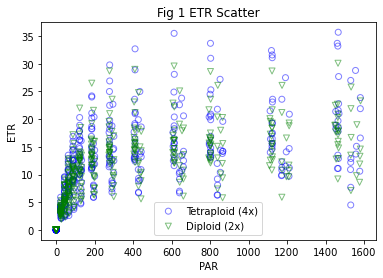

In [9]:
array_dates = pd.unique(df["date"])
def period (row):
    if (row["date"] == array_dates[1] or row["date"] == array_dates[0]):
        return "1"
    if (row["date"] == array_dates[2] or row["date"] == array_dates[3]):
        return "2"
    if row["date"] == array_dates[4]:
        return "3"
df["period"] = df.apply (lambda row: period(row), axis=1)

tetraploid = df.loc[df["ploidy"] == "4x"]
diploid = df.loc[df["ploidy"] == "2x"]

fig = 0

#Figure 1
fig = fig + 1
title = ("Fig "+str(fig)+" ETR Scatter")
plt.title(title)
plt.scatter(tetraploid["par"], tetraploid["etr"], label = "Tetraploid (4x)", facecolors='none', edgecolors = "blue", marker = "o",alpha=0.5)
plt.scatter(diploid["par"], diploid["etr"], label = "Diploid (2x)", facecolors='none', edgecolors = "green", marker = "v",alpha=0.5)
plt.legend(loc="best")
plt.xlabel("PAR")
plt.ylabel("ETR")
plt.show()

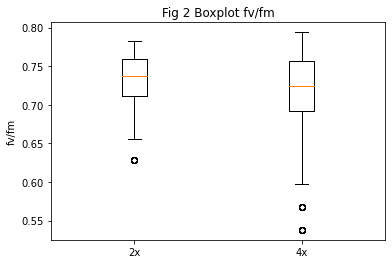

In [10]:
fig = fig + 1
box_data = (diploid["fv/fm"], tetraploid["fv/fm"])

title = ("Fig "+str(fig)+" Boxplot fv/fm")
plt.title(title)
plt.boxplot(box_data)
plt.xticks([1, 2], ['2x', '4x'])
plt.ylabel("fv/fm")
plt.show()

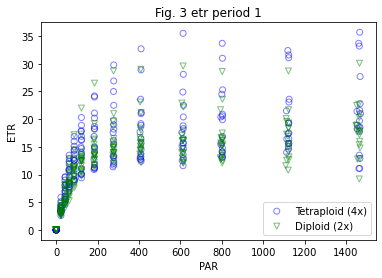

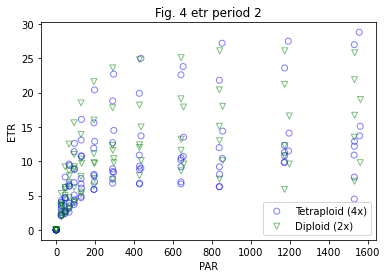

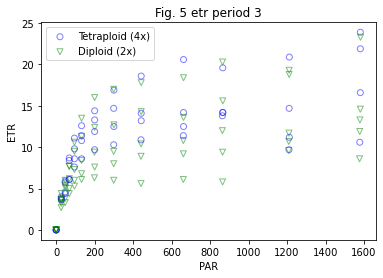

In [11]:
for i in range (3):
    tetra = tetraploid.loc[tetraploid["period"] == str(i+1)]
    diplo = diploid.loc[diploid["period"] == str(i+1)]
    fig = fig + 1
    title = "Fig. "+str(fig) + " etr period " + str(i+1)
    plt.title(title)
    plt.scatter(tetra["par"], tetra["etr"], label = "Tetraploid (4x)", facecolors='none', edgecolors = "blue", marker = "o",alpha=0.5)
    plt.scatter(diplo["par"], diplo["etr"], label = "Diploid (2x)", facecolors='none', edgecolors = "green", marker = "v",alpha=0.5)
    plt.legend(loc="best")
    plt.xlabel("PAR")
    plt.ylabel("ETR")
    plt.show()                      

Period 1 2021-08-10 & 2021-09-01 -> 
Period 2 2021-10-22 & 2021-10-28 ->
Period 3 2021-12-19

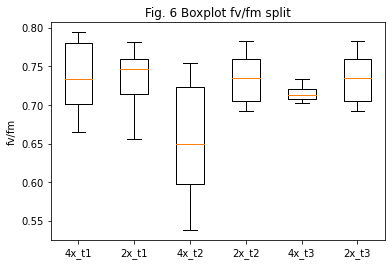

In [12]:
tetra_p1 = tetraploid.loc[tetraploid["period"] == "1"]
tetra_p2 = tetraploid.loc[tetraploid["period"] == "2"]
tetra_p3 = tetraploid.loc[tetraploid["period"] == "3"]

dip_p1 = diploid.loc[diploid["period"] == "1"]
dip_p2 = diploid.loc[diploid["period"] == "3"]
dip_p3 = diploid.loc[diploid["period"] == "3"]

box_data = (tetra_p1["fv/fm"], dip_p1["fv/fm"],tetra_p2["fv/fm"], dip_p2["fv/fm"],
           tetra_p3["fv/fm"], dip_p3["fv/fm"])

fig = fig + 1
title = ("Fig. "+str(fig)+" Boxplot fv/fm split")
plt.title(title)
plt.boxplot(box_data)
plt.xticks([1, 2, 3, 4, 5, 6], ["4x_t1","2x_t1","4x_t2","2x_t2","4x_t3","2x_t3"])
plt.ylabel("fv/fm")
plt.show()

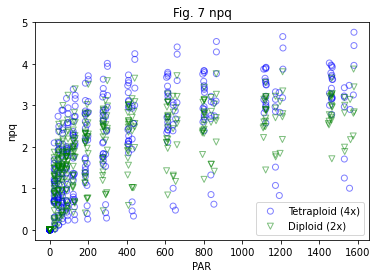

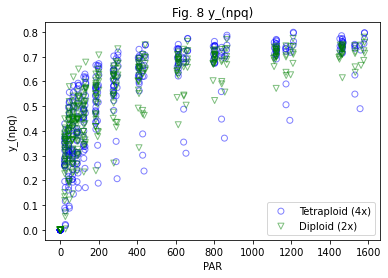

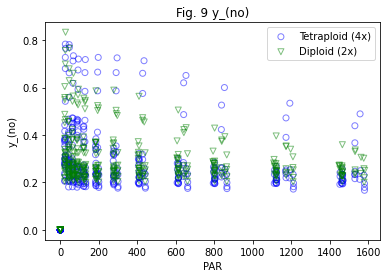

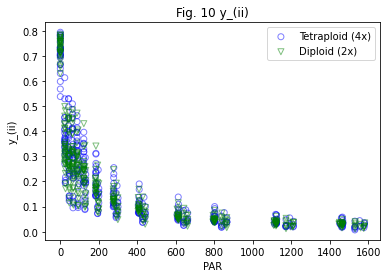

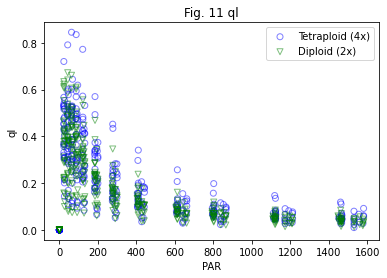

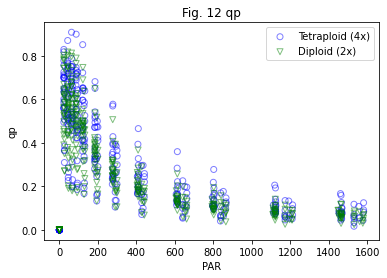

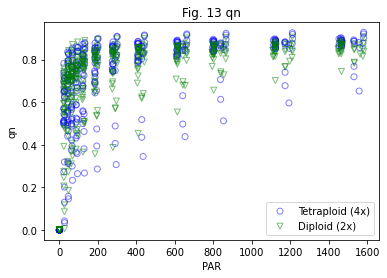

In [13]:
para = ["npq","y_(npq)","y_(no)","y_(ii)","ql","qp","qn"]
for i in range(7):
    fig = fig + 1
    title = "Fig. " + str(fig) + " " +str((para[i]))    
    plt.title(title)
    plt.scatter(tetraploid["par"], tetraploid[para[i]], label = "Tetraploid (4x)", facecolors='none', edgecolors = "blue", marker = "o",alpha=0.5)
    plt.scatter(diploid["par"], diploid[para[i]], label = "Diploid (2x)", facecolors='none', edgecolors = "green", marker = "v",alpha=0.5)
    plt.legend(loc="best")
    plt.xlabel("PAR")
    plt.ylabel(para[i])
    plt.show()

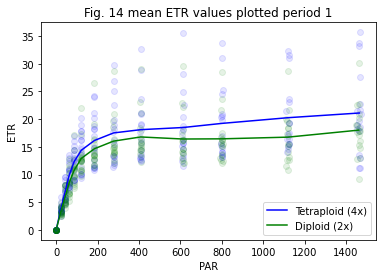

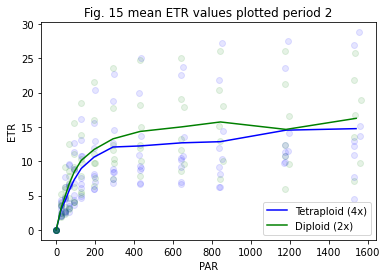

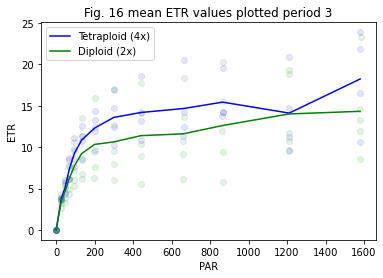

In [14]:
for i in range (3):
    tetra = tetraploid.loc[tetraploid["period"] == str(i+1)]
    diplo = diploid.loc[diploid["period"] == str(i+1)]

    etr4m = tetra.groupby("mnr", as_index=False)['etr'].mean()
    par4m = tetra.groupby("mnr", as_index=False)['par'].mean()
    etr2m = diplo.groupby("mnr", as_index=False)['etr'].mean()
    par2m = diplo.groupby("mnr", as_index=False)['par'].mean()
    fig = fig + 1
    title = "Fig. "+str(fig)+" mean ETR values plotted period "+str(i+1)
    plt.title(title)
    plt.plot(par4m["par"],etr4m["etr"], label = "Tetraploid (4x)", color = "blue")
    plt.scatter(tetra["par"],tetra["etr"], color = "blue",alpha=0.1)

    plt.plot(par2m["par"],etr2m["etr"],label = "Diploid (2x)", color = "green")
    plt.scatter(diplo["par"],diplo["etr"], color = "green",alpha=0.1)

    plt.legend(loc="best")
    plt.xlabel("PAR")
    plt.ylabel("ETR")
    plt.show()

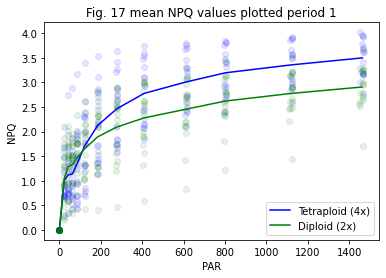

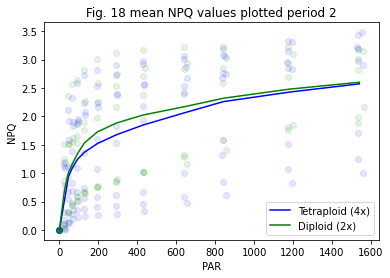

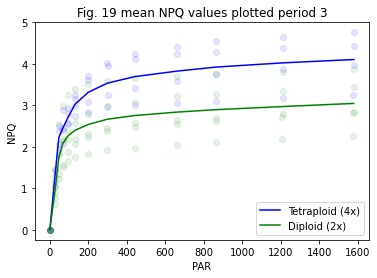

In [15]:
for i in range (3):
    tetra = tetraploid.loc[tetraploid["period"] == str(i+1)]
    diplo = diploid.loc[diploid["period"] == str(i+1)]

    etr4m = tetra.groupby("mnr", as_index=False)['npq'].mean()
    par4m = tetra.groupby("mnr", as_index=False)['par'].mean()
    etr2m = diplo.groupby("mnr", as_index=False)['npq'].mean()
    par2m = diplo.groupby("mnr", as_index=False)['par'].mean()
    
    fig = fig + 1
    title = "Fig. "+str(fig)+" mean NPQ values plotted period "+str(i+1)
    plt.title(title)
    plt.plot(par4m["par"],etr4m["npq"], label = "Tetraploid (4x)", color = "blue")
    plt.scatter(tetra["par"],tetra["npq"], color = "blue",alpha=0.1)

    plt.plot(par2m["par"],etr2m["npq"],label = "Diploid (2x)", color = "green")
    plt.scatter(diplo["par"],diplo["npq"], color = "green",alpha=0.1)

    plt.legend(loc="best")
    plt.xlabel("PAR")
    plt.ylabel("NPQ")
    plt.show()

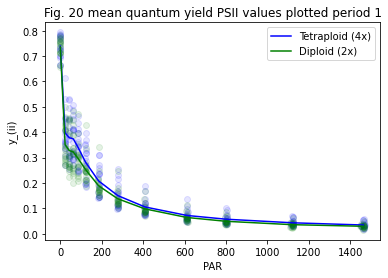

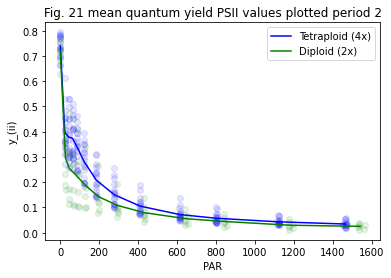

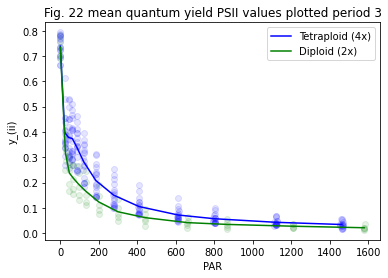

In [16]:
for i in range (3):
    tetra = tetraploid.loc[tetraploid["period"] == str(+1)]
    diplo = diploid.loc[diploid["period"] == str(i+1)]

    etr4m = tetra.groupby("mnr", as_index=False)['y_(ii)'].mean()
    par4m = tetra.groupby("mnr", as_index=False)['par'].mean()
    etr2m = diplo.groupby("mnr", as_index=False)['y_(ii)'].mean()
    par2m = diplo.groupby("mnr", as_index=False)['par'].mean()
    
    fig = fig + 1
    title = "Fig. "+str(fig)+" mean quantum yield PSII values plotted period "+str(i+1)
    plt.title(title)
    plt.plot(par4m["par"],etr4m["y_(ii)"], label = "Tetraploid (4x)", color = "blue")
    plt.scatter(tetra["par"],tetra["y_(ii)"], color = "blue",alpha=0.1)

    plt.plot(par2m["par"],etr2m["y_(ii)"],label = "Diploid (2x)", color = "green")
    plt.scatter(diplo["par"],diplo["y_(ii)"], color = "green",alpha=0.1)

    plt.legend(loc="best")
    plt.xlabel("PAR")
    plt.ylabel("y_(ii)")
    plt.show()

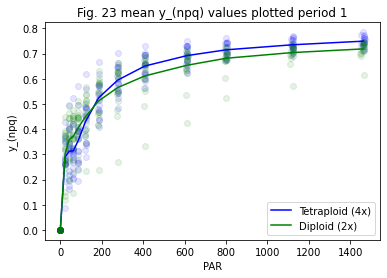

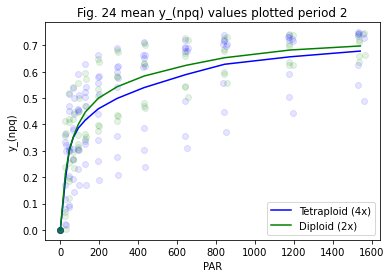

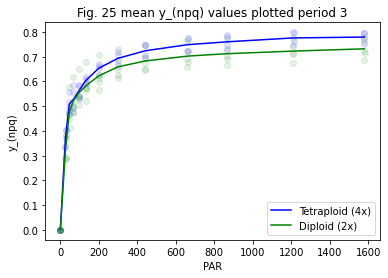

In [17]:
for i in range (3):
    tetra = tetraploid.loc[tetraploid["period"] == str(i+1)]
    diplo = diploid.loc[diploid["period"] == str(i+1)]

    etr4m = tetra.groupby("mnr", as_index=False)['y_(npq)'].mean()
    par4m = tetra.groupby("mnr", as_index=False)['par'].mean()
    etr2m = diplo.groupby("mnr", as_index=False)['y_(npq)'].mean()
    par2m = diplo.groupby("mnr", as_index=False)['par'].mean()

    fig = fig + 1
    title = "Fig. "+str(fig)+" mean y_(npq) values plotted period "+str(i+1)
    plt.title(title)
    plt.plot(par4m["par"],etr4m["y_(npq)"], label = "Tetraploid (4x)", color = "blue")
    plt.scatter(tetra["par"],tetra["y_(npq)"] ,color = "blue",alpha=0.1)

    plt.plot(par2m["par"],etr2m["y_(npq)"],label = "Diploid (2x)", color = "green")
    plt.scatter(diplo["par"],diplo["y_(npq)"], color = "green", alpha=0.1)

    plt.legend(loc="best")
    plt.xlabel("PAR")
    plt.ylabel("y_(npq)")
    plt.show()

## 3 Curve Fitting

In [18]:
def func(x, a, b,c):
    return (x/(a*x**2+b*x+c)) #(Eilers & Peeters, 1988)

$
x= \frac{I}{aI^2 + bI + c}
$

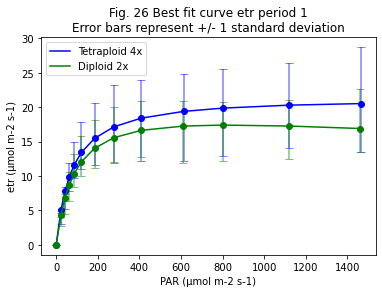

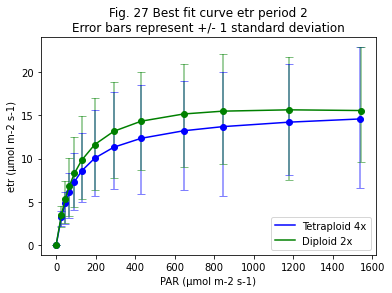

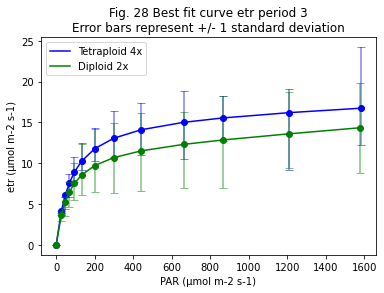

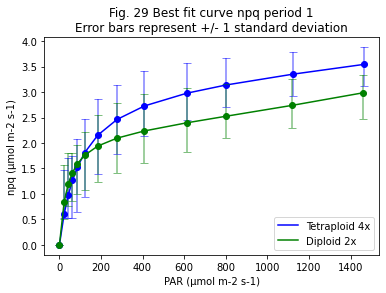

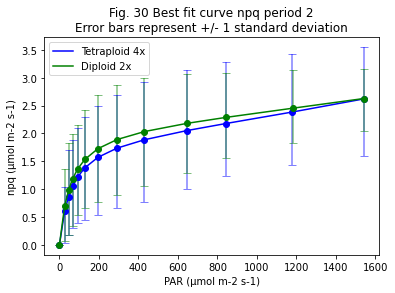

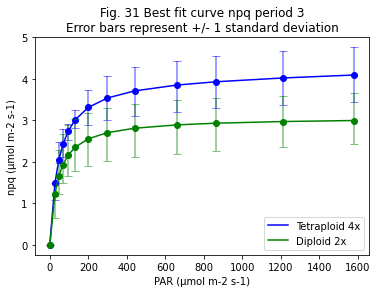

In [19]:
para = ("etr","npq")
dlist = (tetraploid, diploid)
colors = ("blue","green")
names = ("Tetraploid 4x", "Diploid 2x")

pa = 0
for i in range(6):
    p = i % 3 + 1
    fig = fig + 1
    
    for o in range(2):
        locup = dlist[o]
        data = locup.loc[locup["period"] == str(p)]
        
        title = ("Fig. "+str(fig)+" Best fit curve "+str(para[pa])+" period "+str(p)+"\nError bars represent +/- 1 standard deviation")
        plt.title(title)
        
        y_error = data.groupby("mnr", as_index=False)[para[pa]].std()
        optimizedParameters, pcov = opt.curve_fit(func, data["par"],data[para[pa]],[0.001,0.5,8]);
        x_mean = data.groupby("mnr", as_index=False)["par"].mean()
        y_mean = data.groupby("mnr", as_index=False)[para[pa]].mean()
        
        plt.errorbar(x_mean["par"],y_mean[para[pa]], yerr = y_error[para[pa]],ecolor = colors[o], color = "None",alpha = .5, capsize=4);
        plt.plot(x_mean["par"], func(x_mean["par"], *optimizedParameters), "-", label=names[o],color=colors[o]);
        plt.plot(x_mean["par"], func(x_mean["par"], *optimizedParameters), "o",color=colors[o]);
        
        plt.legend(loc="best")
        plt.xlabel("PAR (µmol m-2 s-1)")
        plt.ylabel(para[pa]+" (µmol m-2 s-1)")
        
    plt.show()
    if i == 2:
        pa = 1

## 4. data clean up branch 2020 and fitted curves

In [20]:
plo = open("data/ingv_id_table.txt","r")
id_key = {}

for p in plo:
    p = p.strip()
    lis = p.split("\t")
    id_key[lis[0]] = lis[1]
plo.close()

In [21]:
output.close()
pddata.close()
output = open("data/lc_2020_branch.txt", "r")
pddata = open("pd-data.csv","w")

l=0
m=0
for line in output:
    top = re.sub("\t",",",line)
    top = re.sub(",-",",0",top)
    if l == 0:
        top = re.sub("2:","",top)
        top = re.sub(" ","_",top)
        top = top.lower()
    if l == 0:    
        pddata.write("mnr,"+"id,"+top)
    if l >= 1:
        iid = re.search("^\d+", line).group(0)
        m = m + 1
        pddata.write(str(m)+","+id_key[iid]+","+top)
        
        if m == 11:
            m = 0
    l=l+1
output.close()
pddata.close()

In [22]:
df = pd.read_csv("pd-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mnr        297 non-null    int64  
 1   id         297 non-null    object 
 2   ingrid_id  297 non-null    object 
 3   ploidy     297 non-null    object 
 4   par        297 non-null    int64  
 5   f          297 non-null    int64  
 6   fm'        297 non-null    int64  
 7   etr        297 non-null    float64
 8   npq        297 non-null    float64
 9   y_(ii)     297 non-null    float64
 10  y_(no)     297 non-null    float64
 11  y_(npq)    297 non-null    float64
 12  fv/fm      297 non-null    float64
dtypes: float64(6), int64(4), object(3)
memory usage: 30.3+ KB


In [23]:
df[0:12].style

,mnr,id,ingrid_id,ploidy,par,f,fm',etr,npq,y_(ii),y_(no),y_(npq),fv/fm
0,1,SO18_H2_3_15,111A,4x,0,270,905,0.000000,0.000000,0.702000,0.000000,0.000000,0.702000
1,2,SO18_H2_3_15,111A,4x,66,456,589,6.300000,0.537000,0.226000,0.504000,0.270000,0.702000
2,3,SO18_H2_3_15,111A,4x,91,377,477,8.000000,0.897000,0.210000,0.417000,0.373000,0.702000
3,4,SO18_H2_3_15,111A,4x,127,370,467,11.100000,0.938000,0.208000,0.409000,0.383000,0.702000
4,5,SO18_H2_3_15,111A,4x,193,374,455,14.400000,0.989000,0.178000,0.413000,0.409000,0.702000
5,6,SO18_H2_3_15,111A,4x,290,362,425,18.000000,1.129000,0.148000,0.400000,0.452000,0.702000
6,7,SO18_H2_3_15,111A,4x,428,350,393,19.600000,1.303000,0.109000,0.387000,0.504000,0.702000
7,8,SO18_H2_3_15,111A,4x,642,336,364,20.800000,1.486000,0.077000,0.371000,0.552000,0.702000
8,9,SO18_H2_3_15,111A,4x,839,321,339,18.700000,1.670000,0.053000,0.355000,0.592000,0.702000
9,10,SO18_H2_3_15,111A,4x,1173,305,318,20.200000,1.846000,0.041000,0.337000,0.622000,0.702000


## 4.1 Curve fitting branch LC 2020

In [24]:
tetraploid = df.loc[df["ploidy"] == "4x"]
triploid = df.loc[df["ploidy"] == "3x"]
diploid = df.loc[df["ploidy"] == "2x"]

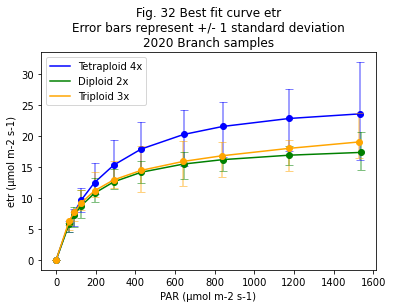

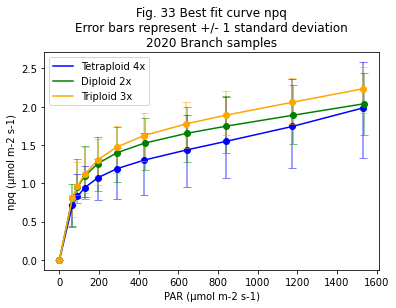

In [25]:
para = ("etr","npq")
dlist = (tetraploid, diploid, triploid)
colors = ("blue","green","orange")
names = ("Tetraploid 4x", "Diploid 2x", "Triploid 3x")

pa = 0
for i in range(2):
    fig = fig + 1

    for o in range (3):
        data = dlist[o]
    
        title = ("Fig. "+str(fig)+" Best fit curve "+str(para[pa])+"\nError bars represent +/- 1 standard deviation\n2020 Branch samples")
        plt.title(title)

        y_error = data.groupby("mnr", as_index=False)[para[pa]].std()
        optimizedParameters, pcov = opt.curve_fit(func, data["par"],data[para[pa]],[0.001,0.5,8]);
        x_mean = data.groupby("mnr", as_index=False)["par"].mean()
        y_mean = data.groupby("mnr", as_index=False)[para[pa]].mean()
                
        plt.errorbar(x_mean["par"],y_mean[para[pa]], yerr = y_error[para[pa]],ecolor = colors[o], color = "None",alpha = .5, capsize=4);
        plt.plot(x_mean["par"], func(x_mean["par"], *optimizedParameters), "-", label=names[o],color=colors[o]);
        plt.plot(x_mean["par"], func(x_mean["par"], *optimizedParameters), "o",color=colors[o]);
        
        plt.legend(loc="best")
        plt.xlabel("PAR (µmol m-2 s-1)")
        plt.ylabel(para[pa]+" (µmol m-2 s-1)")        

    plt.show()
    pa = pa + 1
        

## 5 data clean up branch 2021 and fitted curves

In [26]:
output.close()
pddata.close()
output = open("data/lc_2021_branch.txt", "r")
pddata = open("pd-data.csv","w")

l=0
m=0
for line in output:
    top = re.sub("\t",",",line)
    top = re.sub(",-",",0",top)
    if l == 0:
        top = re.sub("2:","",top)
        top = re.sub(" ","_",top)
        top = top.lower()
    if l == 0:    
        pddata.write("mnr,"+"id,"+top)
    if l >= 1:
        iid = re.search("^\d+", line).group(0)
        m = m + 1
        pddata.write(str(m)+","+id_key[iid]+","+top)
        
        if m == 11:
            m = 0
    l=l+1
output.close()
pddata.close()

In [27]:
df = pd.read_csv("pd-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mnr            132 non-null    int64  
 1   id             132 non-null    object 
 2   ingrid_id      132 non-null    object 
 3   ploidy         132 non-null    object 
 4   time_(rel/ms)  132 non-null    int64  
 5   date           132 non-null    object 
 6   time           132 non-null    object 
 7   type           132 non-null    object 
 8   no.            132 non-null    int64  
 9   mark           132 non-null    object 
 10  f              132 non-null    int64  
 11  fm'            132 non-null    int64  
 12  par            132 non-null    int64  
 13  y_(ii)         132 non-null    float64
 14  etr            132 non-null    float64
 15  fo'            132 non-null    int64  
 16  etr-f.         132 non-null    float64
 17  qp             132 non-null    float64
 18  qn        

In [28]:
df[0:12]

,mnr,id,ingrid_id,ploidy,time_(rel/ms),date,time,type,no.,mark,...,etr-f.,qp,qn,ql,npq,y_(no),y_(npq),fo,fm,fv/fm
0,1,SO18_H2_6_8,7A,2x,642,2021-06-22,16:39:03,FO,149,B,...,0.84,0.000,0.000,0.000,0.000,0.000,0.000,287,1280,0.776
1,2,SO18_H2_6_8,7A,2x,70628,2021-06-22,16:40:13,F,150,B,...,0.84,0.482,0.689,0.277,1.433,0.295,0.422,287,1280,0.776
2,3,SO18_H2_6_8,7A,2x,140639,2021-06-22,16:41:23,F,151,B,...,0.84,0.475,0.739,0.286,1.753,0.267,0.468,287,1280,0.776
3,4,SO18_H2_6_8,7A,2x,210621,2021-06-22,16:42:33,F,152,B,...,0.84,0.421,0.782,0.256,2.122,0.249,0.529,287,1280,0.776
4,5,SO18_H2_6_8,7A,2x,280610,2021-06-22,16:43:43,F,153,B,...,0.84,0.319,0.811,0.189,2.422,0.245,0.595,287,1280,0.776
5,6,SO18_H2_6_8,7A,2x,350589,2021-06-22,16:44:53,F,154,B,...,0.84,0.240,0.824,0.138,2.596,0.245,0.637,287,1280,0.776
6,7,SO18_H2_6_8,7A,2x,420578,2021-06-22,16:46:03,F,155,B,...,0.84,0.163,0.833,0.092,2.721,0.248,0.674,287,1280,0.776
7,8,SO18_H2_6_8,7A,2x,490543,2021-06-22,16:47:13,F,156,B,...,0.84,0.096,0.843,0.053,2.879,0.246,0.709,287,1280,0.776
8,9,SO18_H2_6_8,7A,2x,560523,2021-06-22,16:48:23,F,157,B,...,0.84,0.085,0.846,0.047,2.926,0.245,0.715,287,1280,0.776
9,10,SO18_H2_6_8,7A,2x,630542,2021-06-22,16:49:33,F,158,B,...,0.84,0.080,0.849,0.044,2.975,0.242,0.721,287,1280,0.776


## 4.1 Fitted curve

In [29]:
tetraploid = df.loc[df["ploidy"] == "4x"]
diploid = df.loc[df["ploidy"] == "2x"]

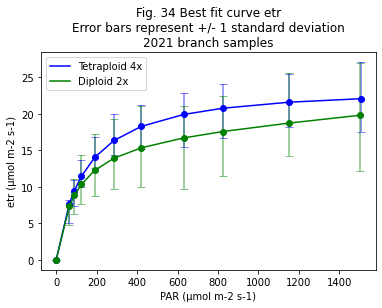

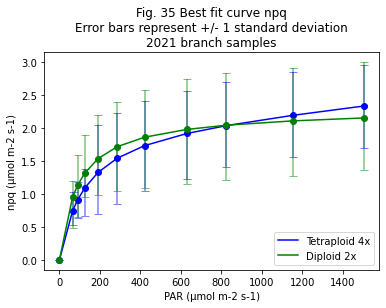

In [30]:
para = ("etr","npq")
dlist = (tetraploid, diploid)
colors = ("blue","green")
names = ("Tetraploid 4x", "Diploid 2x")

pa = 0
for i in range(2):
    fig = fig + 1

    for o in range (2):
        data = dlist[o]
    
        title = ("Fig. "+str(fig)+" Best fit curve "+str(para[pa])+"\nError bars represent +/- 1 standard deviation\n2021 branch samples")
        plt.title(title)

        y_error = data.groupby("mnr", as_index=False)[para[pa]].std()
        optimizedParameters, pcov = opt.curve_fit(func, data["par"],data[para[pa]],[0.001,0.5,8]);
        x_mean = data.groupby("mnr", as_index=False)["par"].mean()
        y_mean = data.groupby("mnr", as_index=False)[para[pa]].mean()
                
        plt.errorbar(x_mean["par"],y_mean[para[pa]], yerr = y_error[para[pa]],ecolor = colors[o], color = "None",alpha = .5, capsize=4);
        plt.plot(x_mean["par"], func(x_mean["par"], *optimizedParameters), "-", label=names[o],color=colors[o]);
        plt.plot(x_mean["par"], func(x_mean["par"], *optimizedParameters), "o",color=colors[o]);
        
        plt.legend(loc="best")
        plt.xlabel("PAR (µmol m-2 s-1)")
        plt.ylabel(para[pa]+" (µmol m-2 s-1)")        

    plt.show()
    pa = pa + 1

## 6 Leaf trait data vis

In [31]:
output.close()
pddata.close()
output = open("data/trait_2020.txt", "r")
pddata = open("pd-data.csv","w")

l=0
m=0
for line in output:
    top = re.sub("\t",",",line)
    pddata.write(top)

output.close()
pddata.close()

In [32]:
df = pd.read_csv("pd-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n         127 non-null    int64  
 1   plant_id  127 non-null    object 
 2   ploidy    127 non-null    object 
 3   habitat   127 non-null    object 
 4   W_g       127 non-null    float64
 5   TW_g      127 non-null    float64
 6   DW_g      127 non-null    float64
 7   area_cm2  123 non-null    float64
 8   RWC       127 non-null    float64
 9   LMA_gm2   123 non-null    float64
 10  pixels    123 non-null    float64
 11  p_cm2     127 non-null    int64  
 12  cup_mg    86 non-null     float64
 13  ws_mg     86 non-null     float64
 14  s_mg      86 non-null     float64
 15  tray_id   86 non-null     object 
 16  fvfm_avg  44 non-null     float64
 17  SLA       123 non-null    float64
 18  whc_p     127 non-null    float64
 19  CN_ratio  86 non-null     float64
 20  Np        86 non-null     float6

In [33]:
tetraploid = df.loc[df["ploidy"] == "4x"]
triploid = df.loc[df["ploidy"] == "3x"]
diploid = df.loc[df["ploidy"] == "2x"]

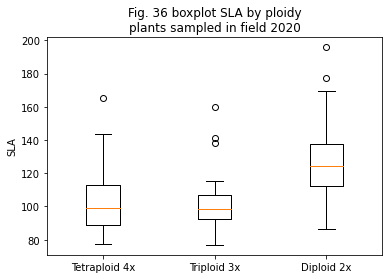

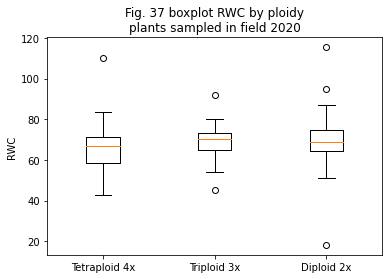

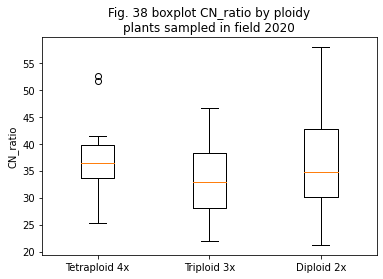

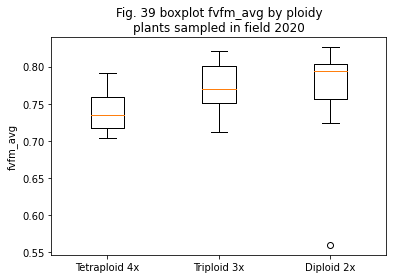

In [34]:
para = ("SLA", "RWC", "CN_ratio","fvfm_avg")

for i in range (4):
    box_data = (tetraploid[para[i]].dropna(),triploid[para[i]].dropna(),diploid[para[i]].dropna())
    fig = 1 + fig
    title = ("Fig. "+str(fig)+" boxplot "+str(para[i])+" by ploidy\nplants sampled in field 2020")
    plt.title(title)
    plt.boxplot(box_data)
    plt.xticks([1,2,3], ["Tetraploid 4x","Triploid 3x","Diploid 2x"])
    plt.ylabel(para[i])
    plt.show()

In [35]:
ridge = df.loc[df["habitat"] == "ridge"]
slope = df.loc[df["habitat"] == "slope"]
riverbed = df.loc[df["habitat"] == "riverbed"]

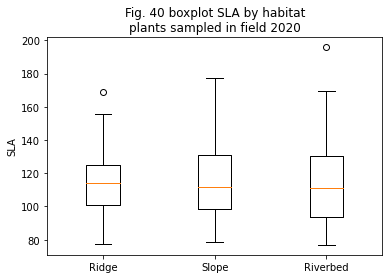

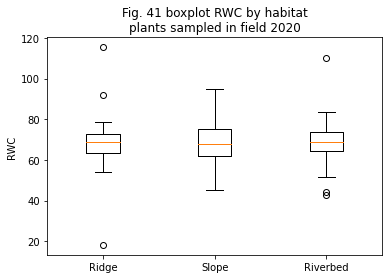

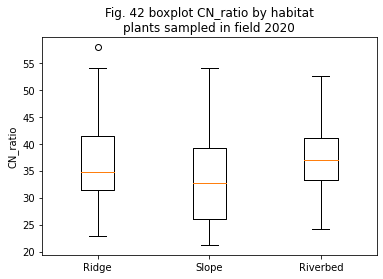

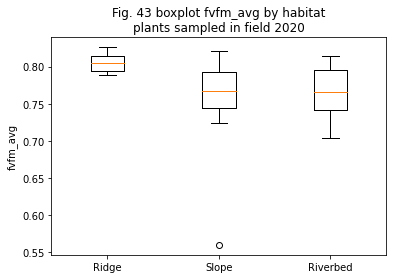

In [36]:
para = ("SLA", "RWC", "CN_ratio","fvfm_avg")

for i in range (4):
    box_data = (ridge[para[i]].dropna(),slope[para[i]].dropna(),riverbed[para[i]].dropna())
    fig = 1 + fig
    title = ("Fig. "+str(fig)+" boxplot "+str(para[i])+" by habitat\nplants sampled in field 2020")
    plt.title(title)
    plt.boxplot(box_data)
    plt.xticks([1,2,3], ["Ridge","Slope","Riverbed"])
    plt.ylabel(para[i])
    plt.show()    

## 7 Lab health

In [37]:
output = open("data/lab_health.txt", "r")
pddata = open("pd-data.csv","w")

l=0
m=0
for line in output:
    top = re.sub("\t",",",line)
    pddata.write(top)

output.close()
pddata.close()

df = pd.read_csv("pd-data.csv")

In [38]:
tetraploid = df.loc[df["Ploidy"] == "4x"]
triploid = df.loc[df["Ploidy"] == "3x"]
diploid = df.loc[df["Ploidy"] == "2x"]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PLANT-ID  306 non-null    int64  
 1   FIELD-ID  306 non-null    object 
 2   SCORE_Y1  306 non-null    int64  
 3   SCORE_Y2  300 non-null    float64
 4   X-CORD    306 non-null    int64  
 5   Y-CORD    306 non-null    int64  
 6   Z-CORD    306 non-null    int64  
 7   Ploidy    304 non-null    object 
 8   SOIL      306 non-null    object 
 9   HABITAT   306 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 24.0+ KB


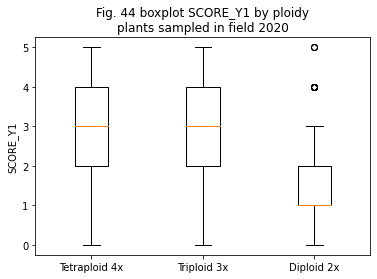

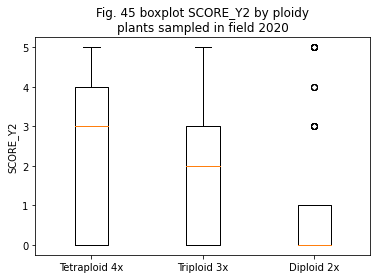

In [40]:
para = ("SCORE_Y1", "SCORE_Y2")

for i in range (2):
    box_data = (tetraploid[para[i]].dropna(),triploid[para[i]].dropna(),diploid[para[i]].dropna())
    fig = 1 + fig
    title = ("Fig. "+str(fig)+" boxplot "+str(para[i])+" by ploidy\nplants sampled in field 2020")
    plt.title(title)
    plt.boxplot(box_data)
    plt.xticks([1,2,3], ["Tetraploid 4x","Triploid 3x","Diploid 2x"])
    plt.ylabel(para[i])
    plt.show()